In [1]:
import MDAnalysis as mda
import MDAnalysis.analysis.distances
import MDAnalysis.transformations
import os
import nglview as nv
import matplotlib.pyplot as plt
import numpy as np


In [2]:
def get_universe(file_path: str) -> tuple:
    """
    get PARM7, DCD files and return universe
    """
    topology = file_path + "somd.prm7"
    trajectory = file_path + "traj000000002.dcd"
    if not os.path.isfile(trajectory):
        trajectory = file_path + "traj000000001.dcd"
    return mda.Universe(topology, trajectory, topology_format="PARM7")

# Water-mediated hydrogen bond between phosphonate group and T193 (T216)

In [3]:
path = f"../outputs/SOMD/lig_h_1~lig_h_2/bound/lambda_1.0000/"
universe = get_universe(path)
workflow = [mda.transformations.unwrap(universe.atoms)]
universe.trajectory.add_transformations(*workflow)
protein = universe.select_atoms("protein")
ligand = universe.select_atoms("resname LIG")
threonine = protein.select_atoms("resid 193")
phosphonate = ligand.select_atoms("name C10 H4 H5 O12 O13 O14 H11")
waters = universe.select_atoms("resname WAT")
threonine_hb_atoms = threonine.select_atoms("name O HB HG21 HG22 HG23")

### Track water residues at the position of WAT 3356 at frame 206


In [4]:
reference_frame = 206
universe.trajectory[reference_frame]
print(universe.trajectory.frame)
reference_position = universe.select_atoms("resid 13356").center_of_mass()
print(reference_position, universe.select_atoms("resid 13356").positions)
print(ligand.resids)

206
[40.6513095  46.87569961 34.58076829] [[40.650505 46.876865 34.5152  ]
 [41.01187  46.197838 35.084908]
 [40.303516 47.535057 35.11737 ]]
[17106 17106 17106 17106 17106 17106 17106 17106 17106 17106 17106 17106
 17106 17106 17106 17106 17106 17106 17106 17106 17106 17106 17106 17106
 17106 17106 17106 17106 17106 17106 17106 17106 17106]


In [10]:
n_frames = universe.trajectory.n_frames
n_waters = len(waters)
close_waters = []
close_frames = []
for frame in range(n_frames):
    universe.trajectory[frame]
    print(f"at frame {frame}, reference position: {reference_position}")
    for i in range(n_waters):
        water_position = waters[i].position
        distance_from_reference = mda.analysis.distances.distance_array(reference_position, water_position)[0][0]
        if distance_from_reference <= 3.0:
            close_waters.append(waters[i].resid)
            close_frames.append(frame)
    # all_water_positions = [water.position for water in waters]
    # distances_from_reference = [mda.analysis.distances.distance_array(reference_position, position)[0][0] for position in all_water_positions]
    # close_waters = [waters[i].resid for i in range(n_waters) if distances_from_reference[i] <= 3.0]
    

at frame 0, reference position: [40.6513095  46.87569961 34.58076829]
at frame 1, reference position: [40.6513095  46.87569961 34.58076829]
at frame 2, reference position: [40.6513095  46.87569961 34.58076829]
at frame 3, reference position: [40.6513095  46.87569961 34.58076829]
at frame 4, reference position: [40.6513095  46.87569961 34.58076829]
at frame 5, reference position: [40.6513095  46.87569961 34.58076829]
at frame 6, reference position: [40.6513095  46.87569961 34.58076829]
at frame 7, reference position: [40.6513095  46.87569961 34.58076829]
at frame 8, reference position: [40.6513095  46.87569961 34.58076829]
at frame 9, reference position: [40.6513095  46.87569961 34.58076829]
at frame 10, reference position: [40.6513095  46.87569961 34.58076829]
at frame 11, reference position: [40.6513095  46.87569961 34.58076829]
at frame 12, reference position: [40.6513095  46.87569961 34.58076829]
at frame 13, reference position: [40.6513095  46.87569961 34.58076829]
at frame 14, ref

In [11]:
close_waters

[9839,
 9857,
 9866,
 9866,
 9866,
 9871,
 9839,
 9839,
 9866,
 9866,
 9866,
 9857,
 9866,
 9866,
 9866,
 9874,
 9866,
 9866,
 9866,
 9874,
 9874,
 9874,
 9866,
 9866,
 9866,
 9874,
 9874,
 9874,
 9882,
 9857,
 9866,
 9866,
 9866,
 9874,
 9874,
 9874,
 9882,
 9866,
 9866,
 9866,
 9874,
 9874,
 9874,
 9839,
 9857,
 9866,
 9866,
 9866,
 9874,
 9874,
 9874,
 9882,
 9839,
 9839,
 9866,
 9866,
 9866,
 9874,
 9874,
 9874,
 6324,
 9774,
 9839,
 9839,
 9839,
 9866,
 9866,
 9866,
 9874,
 9874,
 9874,
 6324,
 6324,
 9857,
 9866,
 9866,
 9866,
 9874,
 9874,
 9874,
 9839,
 9839,
 9839,
 9857,
 9866,
 9866,
 9866,
 9874,
 9874,
 9874,
 9839,
 9866,
 9866,
 9866,
 9874,
 9874,
 9874,
 6324,
 9839,
 9839,
 9839,
 9857,
 9866,
 9866,
 9866,
 9874,
 9874,
 9874,
 6324,
 9839,
 9839,
 9839,
 9857,
 9866,
 9866,
 9866,
 9874,
 9874,
 9874,
 9839,
 9857,
 9866,
 9866,
 9866,
 9874,
 9874,
 9874,
 9839,
 9857,
 9866,
 9866,
 9866,
 9874,
 9874,
 9874,
 9882,
 9773,
 9773,
 9857,
 9866,
 9866,
 9866,
 9874,

In [9]:
close_waters_string = str(close_waters).replace("[","").replace("]","").replace(",","")
test = waters.select_atoms(f"resid {close_waters_string}")
view = nv.show_mdanalysis(ligand+test+threonine)
view.add_surface("protein")
view.add_representation("ball+stick")
view

NGLWidget(max_frame=499)

In [7]:
n_frames = len(universe.trajectory)
water_residues = waters.residues.resids
times = []
# uncomment for testing
# n_frames = 100
for frame in range(n_frames):
    universe.trajectory[frame]
    print(f"at frame {frame}")
    phosphonate_com = phosphonate.center_of_mass()
    threonine_oxygen = threonine_hb_atoms.select_atoms("name O").center_of_mass()
    # threonine_hb_com = threonine_hb_atoms.center_of_mass()
    water_positions = [water.position for water in waters]
    print("getting distances")
    water_phosphonate_distances = [mda.analysis.distances.distance_array(phosphonate_com, water_position)[0][0] for water_position in water_positions]
    water_threonine_distances = [mda.analysis.distances.distance_array(threonine_oxygen, water_position)[0][0] for water_position in water_positions]
    print("done getting distances")
    
    phosphonate_waters = [waters[i].resid for i in range(len(waters)) if water_phosphonate_distances[i] <= 5.0]
    threonine_waters = [waters[i].resid for i in range(len(waters)) if water_threonine_distances[i] <= 5.0]
    
    times.append(universe.trajectory[frame].time)

# for i in range(len(water_phosphonate_distances)):
    # if water_phosphonate_distances[i] <= 6.0:
        # test.append(waters[i].resids)

# [y for y in a if y not in b]
    

at frame 0
getting distances
done getting distances
at frame 1
getting distances
done getting distances
at frame 2
getting distances
done getting distances
at frame 3
getting distances
done getting distances
at frame 4
getting distances
done getting distances
at frame 5
getting distances
done getting distances
at frame 6
getting distances
done getting distances
at frame 7
getting distances
done getting distances
at frame 8
getting distances
done getting distances
at frame 9
getting distances
done getting distances
at frame 10
getting distances
done getting distances
at frame 11
getting distances
done getting distances
at frame 12
getting distances
done getting distances
at frame 13
getting distances
done getting distances
at frame 14
getting distances
done getting distances
at frame 15
getting distances
done getting distances
at frame 16
getting distances
done getting distances
at frame 17
getting distances
done getting distances
at frame 18
getting distances
done getting distances
at 

In [13]:
close_waters.resids

array([  636,   636,   636,  2153,  2153,  2153,  2499,  2499,  2499,
        3401,  3401,  3401,  3604,  3604,  3604,  6361,  6361,  6361,
        7091,  7091,  7091,  7405,  7405,  7405,  8171,  8171,  8171,
        9133,  9133,  9133,  9152,  9152,  9152,  9923,  9923,  9923,
        9937,  9937,  9937, 13478, 13478, 13478])

In [34]:
close_waters_string = str(phosphonate_waters).replace("[", "").replace("]","").replace(",", "")+str(threonine_waters).replace("[","").replace("]","").replace(",","")
close_waters = waters.select_atoms(f"resid {close_waters_string}")
active_site = ligand+threonine+close_waters
view = nv.show_mdanalysis(active_site)
view.add_representation("ball+stick")
view


NameError: name 'phosphonate_waters' is not defined

In [7]:
active_site_and_all_waters = ligand+threonine+waters
view=nv.show_mdanalysis(active_site_and_all_waters)
view.add_representation("ball+stick")
view.add_surface("protein", color="white", opacity=0.6)
view

NGLWidget(max_frame=499)

In [90]:
water = waters.select_atoms("name H1 and resid 7405").positions
water

array([[20.6256 , 67.02602, 71.53808]], dtype=float32)

In [14]:
phosphonate_distances = []
threonine_distances = []
time = []
for frame in range(len(universe.trajectory)):
    universe.trajectory[frame]
    print(f"at frame {frame}")
    hydrogen1 = waters.select_atoms("name H1 and resid 9772").positions
    hydrogen2 = waters.select_atoms("name H2 and resid 9772").positions
    phosphonate_oxygen = phosphonate.select_atoms("name O13").positions
    threonine_oxygen = threonine.select_atoms("name O").positions
    phosphonate_distance = mda.analysis.distances.distance_array(phosphonate_oxygen, hydrogen2)
    phosphonate_distances.append(phosphonate_distance)
    threonine_distance = mda.analysis.distances.distance_array(threonine_oxygen, hydrogen1)
    threonine_distances.append(threonine_distance)
    times.append(universe.trajectory[frame].time)


at frame 0
at frame 1
at frame 2
at frame 3
at frame 4
at frame 5
at frame 6
at frame 7
at frame 8
at frame 9
at frame 10
at frame 11
at frame 12
at frame 13
at frame 14
at frame 15
at frame 16
at frame 17
at frame 18
at frame 19
at frame 20
at frame 21
at frame 22
at frame 23
at frame 24
at frame 25
at frame 26
at frame 27
at frame 28
at frame 29
at frame 30
at frame 31
at frame 32
at frame 33
at frame 34
at frame 35
at frame 36
at frame 37
at frame 38
at frame 39
at frame 40
at frame 41
at frame 42
at frame 43
at frame 44
at frame 45
at frame 46
at frame 47
at frame 48
at frame 49
at frame 50
at frame 51
at frame 52
at frame 53
at frame 54
at frame 55
at frame 56
at frame 57
at frame 58
at frame 59
at frame 60
at frame 61
at frame 62
at frame 63
at frame 64
at frame 65
at frame 66
at frame 67
at frame 68
at frame 69
at frame 70
at frame 71
at frame 72
at frame 73
at frame 74
at frame 75
at frame 76
at frame 77
at frame 78
at frame 79
at frame 80
at frame 81
at frame 82
at frame 83
at

In [15]:
phosphonate_dist = [phosphonate_distances[i][0][0] for i in range(len(phosphonate_distances))] 
threonine_dist = [threonine_distances[i][0][0] for i in range(len(threonine_distances))]

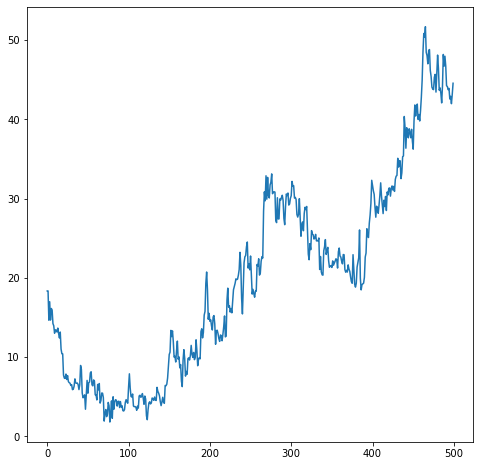

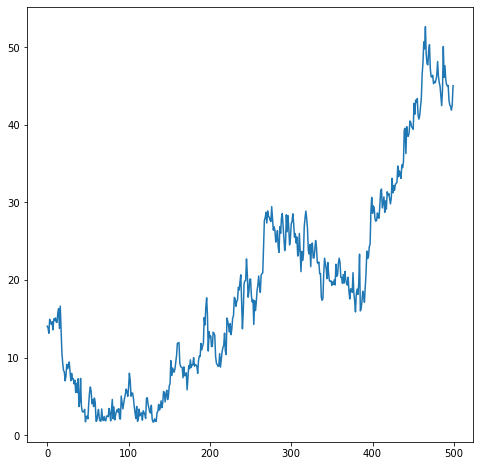

In [16]:
frames = np.arange(0, universe.trajectory.n_frames)

plt.figure(figsize=(8,8))
plt.plot(frames[:], phosphonate_dist[:])
plt.figure(figsize=(8,8))
plt.plot(frames[:], threonine_dist[:])
plt.show()

In [57]:
test_tuple = []
for i in range(len(water_phosphonate_distances)):
    if water_phosphonate_distances[i] <= 40.0:
        test_tuple.append((times[i]))

50502

In [ ]:
test

271

In [59]:
len(water_phosphonate_distances)

50502